<a href="https://colab.research.google.com/github/rushikeshnaik779/HiggsBoson/blob/main/HiggsBoson_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  


Saving kaggle (1).json to kaggle (1).json
User uploaded file "kaggle (1).json" with length 65 bytes


In [ ]:
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c higgs-boson

  0% 0.00/3.15k [00:00<?, ?B/s]
100% 3.15k/3.15k [00:00<00:00, 6.27MB/s]
 59% 10.0M/16.9M [00:00<00:00, 99.0MB/s]
100% 16.9M/16.9M [00:00<00:00, 101MB/s] 
100% 34.8M/34.8M [00:00<00:00, 80.5MB/s]

  0% 0.00/2.58M [00:00<?, ?B/s]
100% 2.58M/2.58M [00:00<00:00, 173MB/s]


In [ ]:
import zipfile 
# 
zip_ref = zipfile.ZipFile("training.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
zip_ref = zipfile.ZipFile("test.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import pandas as pd 

training = pd.read_csv("training.csv")

In [ ]:
training

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,349995,-999.000,71.989,36.548,5.042,-999.00,-999.000,-999.000,1.392,5.042,55.892,1.258,-1.414,-999.0,24.754,-0.414,-0.905,31.137,-0.950,0.380,46.520,2.859,144.665,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,4.505083,b
249996,349996,-999.000,58.179,68.083,22.439,-999.00,-999.000,-999.000,2.585,22.439,50.618,1.162,-1.345,-999.0,23.416,-1.609,2.776,27.202,0.308,1.042,46.737,-0.867,80.408,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,2.497259,b
249997,349997,105.457,60.526,75.839,39.757,-999.00,-999.000,-999.000,2.390,22.183,120.462,1.202,0.529,-999.0,35.636,-0.266,-3.132,42.834,0.381,0.851,23.419,-2.890,198.907,1,41.992,1.800,-0.166,-999.000,-999.00,-999.000,41.992,0.018636,s
249998,349998,94.951,19.362,68.812,13.504,-999.00,-999.000,-999.000,3.365,13.504,55.859,0.999,1.414,-999.0,27.944,-2.211,2.792,27.915,-0.874,-0.296,12.150,0.811,112.718,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.681611,b


In [ ]:
testing = pd.read_csv("test.csv")
testing

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,350000,-999.000,79.589,23.916,3.036,-999.000,-999.000,-999.000,0.903,3.036,56.018,1.536,-1.404,-999.000,22.088,-0.540,-0.609,33.930,-0.504,-1.511,48.509,2.022,98.556,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000
1,350001,106.398,67.490,87.949,49.994,-999.000,-999.000,-999.000,2.048,2.679,132.865,1.777,-1.204,-999.000,30.716,-1.784,3.054,54.574,-0.169,1.795,21.093,-1.138,176.251,1,47.575,-0.553,-0.849,-999.000,-999.000,-999.000,47.575
2,350002,117.794,56.226,96.358,4.137,-999.000,-999.000,-999.000,2.755,4.137,97.600,1.096,-1.408,-999.000,46.564,-0.298,3.079,51.036,-0.548,0.336,19.461,-1.868,111.505,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
3,350003,135.861,30.604,97.288,9.104,-999.000,-999.000,-999.000,2.811,9.104,94.112,0.819,-1.382,-999.000,51.741,0.388,-1.408,42.371,-0.295,2.148,25.131,1.172,164.707,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
4,350004,74.159,82.772,58.731,89.646,1.347,536.663,-0.339,1.028,77.213,721.552,1.713,-0.913,0.004,45.087,-1.548,1.877,77.252,-1.913,2.838,22.200,-0.231,869.614,3,254.085,-1.013,-0.334,185.857,0.335,2.587,599.213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549995,899995,309.530,28.185,170.795,99.349,-999.000,-999.000,-999.000,3.061,2.367,212.640,0.708,1.346,-999.000,67.429,0.657,-2.560,47.761,-1.372,1.431,61.754,1.956,177.103,1,97.451,-1.759,-0.733,-999.000,-999.000,-999.000,97.451
549996,899996,105.653,5.096,77.256,33.040,-999.000,-999.000,-999.000,2.693,33.040,62.279,0.948,0.551,-999.000,31.964,0.162,-2.624,30.315,-1.404,-0.432,12.670,-0.172,130.730,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000
549997,899997,-999.000,69.470,51.766,1.189,-999.000,-999.000,-999.000,1.615,1.189,72.350,0.752,-1.398,-999.000,41.290,0.559,-2.156,31.060,0.578,2.512,49.505,0.336,71.646,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000
549998,899998,107.254,13.500,79.833,50.801,-999.000,-999.000,-999.000,2.026,7.993,135.762,1.087,-0.288,-999.000,44.403,-0.504,1.710,48.260,-0.096,-0.274,7.741,-0.988,243.371,1,43.099,-0.352,-2.594,-999.000,-999.000,-999.000,43.099


# Model Building Base-line

In [ ]:
X, y = training.drop(['EventId', 'Weight', 'Label'], axis=1), training['Weight']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(f'let\'s see the shape of the dataset {X_train.shape}, {X_test.shape}, {y_train.shape}, {y_test.shape}')

let's see the shape of the dataset (200000, 30), (50000, 30), (200000,), (50000,)


In [ ]:
# importing tensor flow 

import tensorflow as tf

In [ ]:
tf.random.set_seed(42)

model  = tf.keras.Sequential([
                              tf.keras.layers.Dense(10),


                              tf.keras.layers.Dense(1, name="output_layer")
])

model.compile(
    loss = tf.keras.losses.mse, 
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mse'], 
    
)

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data= (X_test, y_test))

Epoch 1/10
6250/6250 [==============================] - 10s 2ms/step - loss: 221.4548 - mse: 221.4548 - val_loss: 5.6477 - val_mse: 5.6477
Epoch 2/10
6250/6250 [==============================] - 10s 2ms/step - loss: 6.4253 - mse: 6.4253 - val_loss: 3.0804 - val_mse: 3.0804
Epoch 3/10
6250/6250 [==============================] - 9s 2ms/step - loss: 5.5785 - mse: 5.5785 - val_loss: 4.4522 - val_mse: 4.4522
Epoch 4/10
6250/6250 [==============================] - 10s 2ms/step - loss: 5.4292 - mse: 5.4292 - val_loss: 8.0514 - val_mse: 8.0514
Epoch 5/10
6250/6250 [==============================] - 9s 1ms/step - loss: 5.3101 - mse: 5.3101 - val_loss: 6.0638 - val_mse: 6.0638
Epoch 6/10
6250/6250 [==============================] - 10s 2ms/step - loss: 5.1172 - mse: 5.1172 - val_loss: 7.4159 - val_mse: 7.4159
Epoch 7/10
6250/6250 [==============================] - 9s 1ms/step - loss: 4.9289 - mse: 4.9289 - val_loss: 5.9756 - val_mse: 5.9756
Epoch 8/10
6250/6250 [==============================] 

In [ ]:
# Plot the validation and trianing curves separately 
import matplotlib.pyplot as plt 


def plot_loss_curves(history, metrics_type="accuracy"):
    """
    returns seprate loss curves

    """
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    

    accuracy = history.history[metrics_type]
    val_accuracy = history.history["val_"+metrics_type]

    epochs = range(len(history.history["loss"]))

    # plotting loss
    plt.plot(epochs, loss, label="traiing_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()
    plt.show()
    
    # plotting accuracy 
    plt.plot(epochs, accuracy, label="training mse")
    plt.plot(epochs, val_accuracy, label="testing mse")
    plt.title(f"{metrics_type}")
    plt.xlabel("epochs")
    plt.legend()
    plt.show()

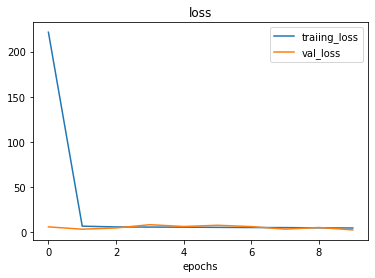

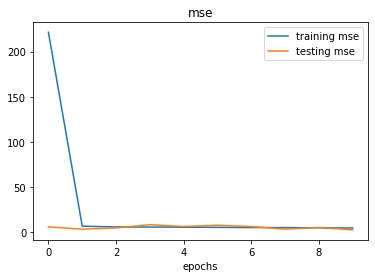

In [ ]:
plot_loss_curves(history, metrics_type="mse")

# Let' Build a baseline NN for classifying Labels 


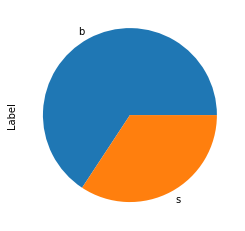

In [ ]:
training.Label.value_counts().plot(kind="pie")
plt.show()

In [ ]:
X, y = training.drop(['EventId', 'Weight', 'Label'], axis=1), training['Label']

In [ ]:
from sklearn.preprocessing import LabelEncoder

le  = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'let\'s see the shape of the dataset {X_train.shape}, {X_test.shape}, {y_train.shape}, {y_test.shape}')


let's see the shape of the dataset (200000, 30), (50000, 30), (200000,), (50000,)


In [ ]:
tf.random.set_seed(42)

model  = tf.keras.Sequential([
                              tf.keras.layers.Dense(10),


                              tf.keras.layers.Dense(1,activation="sigmoid", name="output_layer")
])

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(), 
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy'], 
    
)

In [ ]:
history_2 = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
6250/6250 [==============================] - 11s 2ms/step - loss: 1.6878 - accuracy: 0.6704 - val_loss: 0.8912 - val_accuracy: 0.6969
Epoch 2/10
6250/6250 [==============================] - 11s 2ms/step - loss: 1.1075 - accuracy: 0.6738 - val_loss: 2.1080 - val_accuracy: 0.4278
Epoch 3/10
6250/6250 [==============================] - 10s 2ms/step - loss: 1.0565 - accuracy: 0.6786 - val_loss: 1.4649 - val_accuracy: 0.5341
Epoch 4/10
6250/6250 [==============================] - 10s 2ms/step - loss: 0.9985 - accuracy: 0.6790 - val_loss: 0.7482 - val_accuracy: 0.6923
Epoch 5/10
6250/6250 [==============================] - 10s 2ms/step - loss: 0.9655 - accuracy: 0.6824 - val_loss: 0.7624 - val_accuracy: 0.7216
Epoch 6/10
6250/6250 [==============================] - 10s 2ms/step - loss: 0.9118 - accuracy: 0.6844 - val_loss: 0.5938 - val_accuracy: 0.7252
Epoch 7/10
6250/6250 [==============================] - 10s 2ms/step - loss: 0.8823 - accuracy: 0.6858 - val_loss: 0.8483 - val_ac

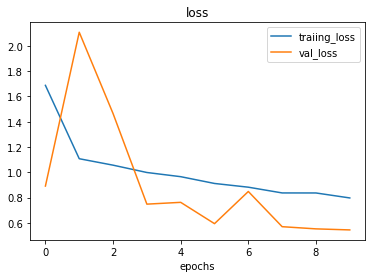

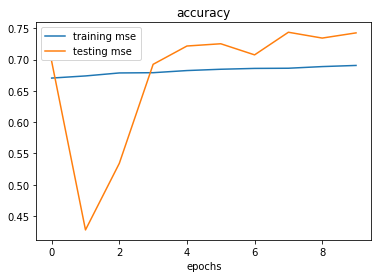

In [ ]:
plot_loss_curves(history_2)